In [2]:
%matplotlib inline

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import skeletonize
from skimage import data
import sknw
import networkx as nx

import sys
sys.path.append("/home/jasonraiti/Documents/GitHub/USC_REU/Project_Files/Jasons_Functions/")

from drawline import * 

from erosion_dilation import * 

from jasons_skeletonize import * 

from trim_edges import * # new_array = trim_edges(path,weight_threshold)

from generate_waypoints import *

from skeleton_to_graph import * # graph = skeleton_to_graph(path)

from open_or_show_image import * # image = open_image(path) , show_image(image)

from locate_nodes import * # total_skeleton,node_locations,edge_locations,endpoint_locations,island_locations = locate_nodes(path)



In [4]:
def zigzag(start_point,end_point,num_turns,zig_zag_size,image): #zigzagsize will scale the size of the zig zags
    
    #num turns must be greater than 2 
    slope_vector = np.array([  end_point[0]- start_point[0] , end_point[1] - start_point[1] ]) # vector representation of slope here in format [y , x]
    step_vector = slope_vector / (num_turns - 1) # partition total change inslope into steps to zig zag across and -1 because the number of turns will be one less than the number of partitions (also in format [y , x])
    normalized_step_vector = step_vector/np.linalg.norm(step_vector) # here we are getting the normalized step_vector so we can use its direction and ignore its magnitude 
    zig_zag_size_vector = normalized_step_vector * zig_zag_size

    for i in range(0,num_turns): 
        

        # ctrl / to toggle commented areas 
        # if i%2 ==0: # set zig and zag values (with alternating directions)
        #     zigzag = zig_zag_size_vector * np.array([1,-1])
        # else:
        #     zigzag =  zig_zag_size_vector * np.array([-1,1])

        if i%2 ==0: # set zig and zag values (with alternating directions)
            zigzag = [-zig_zag_size_vector[1], zig_zag_size_vector[0]]
        else:
            zigzag = [zig_zag_size_vector[1], -zig_zag_size_vector[0]]

        if i == 0: #if i is start point
            pt1 = start_point + step_vector*(i)
            pt2 = start_point + step_vector*(i+1) + zigzag
            try : image = drawline(pt1,pt2,image)
            except : print("error zigging")
            pt_old = pt2 #save endpoint
        elif i == num_turns-1: #elif i+1 is FINAL endpoint
            pt1 = pt_old
            pt2 = start_point + step_vector*(i) 
            try : image = drawline(pt1,pt2,image)
            except : print("error zagging")
        else: #otherwise in the middle 
            pt1 = pt_old
            pt2 = start_point + step_vector*(i+1) +zigzag
            try : image = drawline(pt1,pt2,image)
            except : print("error zig-zagging")
            pt_old =pt2 #save endpoint for next start  
    #image = drawline(start_point,end_point,image) #this is just for error checking, draw a line between start and end points 
    #show_image(image)
    return(image)


skeleton converted to graph

found image at :  ../MAPS/Map_Skeletons/Ibrahim_test_skeletons/preprocessing/trimmed/trimmed_e4_d4___MAPS_Map_originals_Ibrahim_Test_ibrahim_test_bw_png_png_skeleton_lee94_png.png


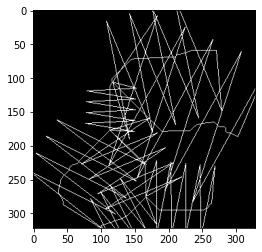

True

In [5]:

path = r'../MAPS/Map_Skeletons/Ibrahim_test_skeletons/preprocessing/trimmed/trimmed_e4_d4___MAPS_Map_originals_Ibrahim_Test_ibrahim_test_bw_png_png_skeleton_lee94_png.png' 
graph = skeleton_to_graph(path)


nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes]) # extract coodinates for each node 
# ps[0,1], ps[0,0] = x , y coordinates for node 0  


image = open_image(path) #start by opening the image, choose image in the function 

for (s,e) in graph.edges():

    start_point = np.array([ ps[s,0] , ps[s,1] ]) #list[] vs tuple() coordinates y , x 
    end_point = np.array([  ps[e,0] , ps[e,1]  ])
    image = zigzag(start_point,end_point,10,graph[s][e]['weight']/2,image)

show_image(image)
cv2.imwrite('zigzag_full.png', image )
